<a href="https://colab.research.google.com/github/HexQuant/exx/blob/main/testing_interval/unavailability_testing_interval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The dependence of the average unavailability due to testing interval of pumps

In [28]:
# Загрузка нужных библиотек
import numpy as np
from scipy.stats import gamma, beta, lognorm, norm, loguniform
from scipy.optimize import minimize_scalar
import matplotlib.pyplot as plt
import seaborn as sns

The mean unavailability of periodically tested component with constant unavailability parameter $q_0$:
$$Q_{mean}=1-\frac{1}{\lambda \cdot TI}(1-q_0)(1-e^{-\lambda \cdot TI})+(1-(1-q_0)e^{-\lambda \cdot TI})\frac{T_r}{TI}$$

In [29]:
def Q(q0, FR, TI, Tr=0):
    return 1-1/(FR*TI) * (1-q0) * (1-np.exp(-FR*TI)) + (1-(1-q0)*np.exp(-FR*TI)) * Tr/TI

In [30]:
# T-book v6
q_fr_pumps = [
    [6.7e-4, 10.4e-7],
    [8.3e-3, 8.9e-7],
    [11.4e-4, 8.0e-6],
    [5.7e-3, 7.4e-7],
    [5.0e-3, 14.0e-6],
    [4.8e-3, 4.9e-6],
    [7.3e-3, 27.5e-7],
    [2.8e-5, 3.3e-6],
    [16.7e-4, 64.0e-7], #Table 1.9.2
    [7.6e-4, 21.6e-7]]  #Table 1.10.2


The dependence of the average unavailability due to testing interval of pump (95% confidence interval):

q0=0.00067 (lognorm, EF=10), FR=1.04e-06


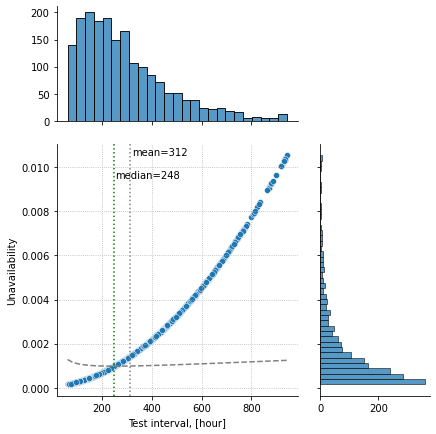

q0=0.0083 (lognorm, EF=10), FR=8.9e-07


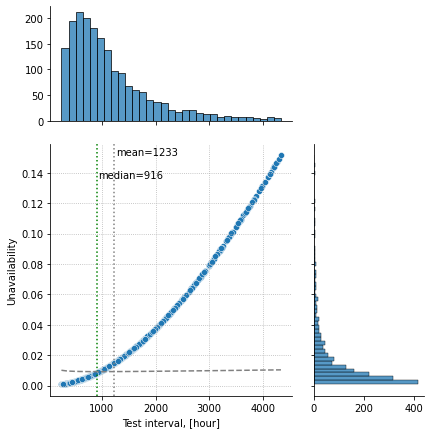

q0=0.00114 (lognorm, EF=10), FR=8e-06


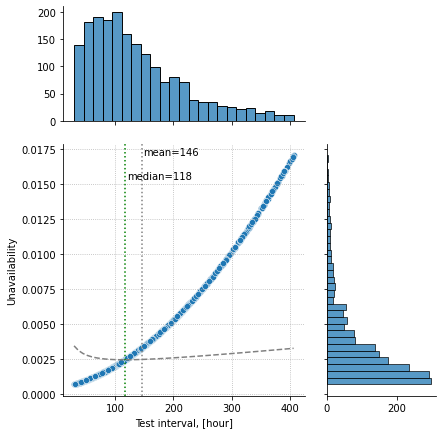

q0=0.0057 (lognorm, EF=10), FR=7.4e-07


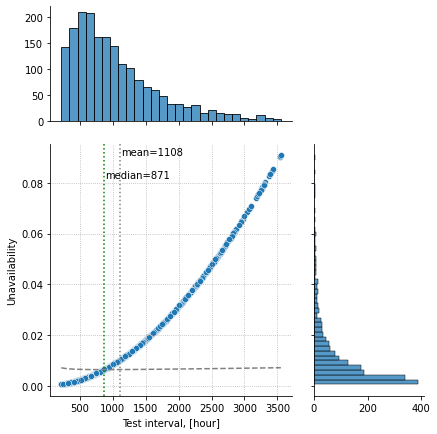

q0=0.005 (lognorm, EF=10), FR=1.4e-05


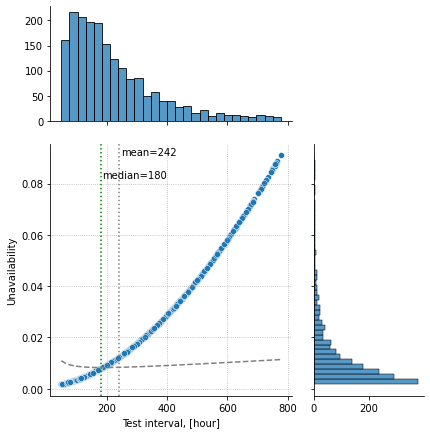

q0=0.0048 (lognorm, EF=10), FR=4.9e-06


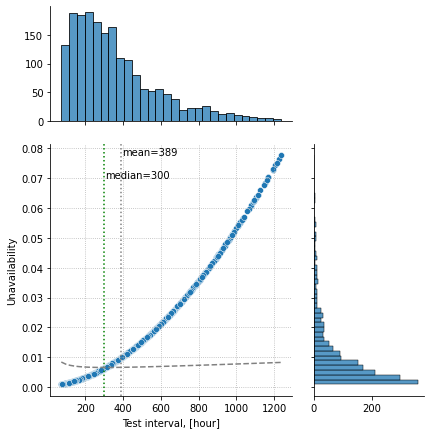

q0=0.0073 (lognorm, EF=10), FR=2.75e-06


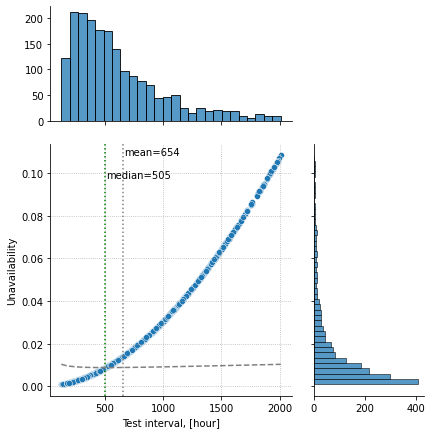

q0=2.8e-05 (lognorm, EF=10), FR=3.3e-06


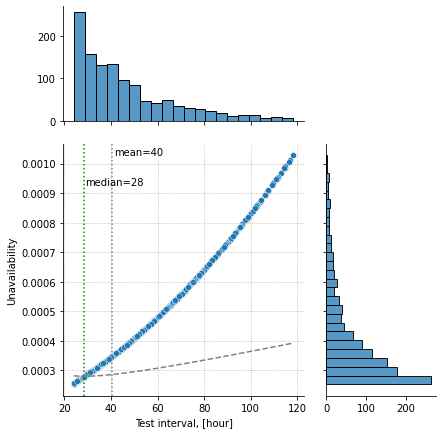

q0=0.00167 (lognorm, EF=10), FR=6.4e-06


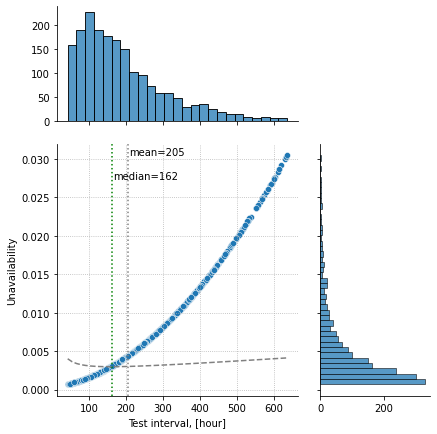

q0=0.00076 (lognorm, EF=10), FR=2.16e-06


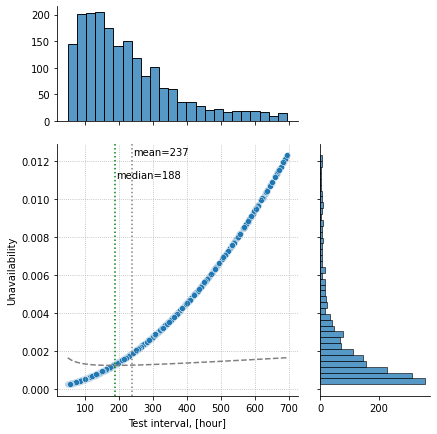

In [31]:
ti_bounds = [24, 8000]
tr= 24*2
EF = 10
N = 2000

for q_mean, fr_mean in q_fr_pumps:
    print(f'q0={q_mean} (lognorm, EF=10), FR={fr_mean}')
    q_rand = lognorm(s=np.log(EF)/1.64485, scale= q_mean)
    ti_opt = []
    y_opt = []
    opt = []
    for q in q_rand.rvs(N):


        func = lambda ti: Q(q, fr_mean, ti, tr)

        res = minimize_scalar(func, bounds=ti_bounds, method='bounded')
        opt.append([res.x, res.fun, q])


    opt = np.array(opt)
    m =opt[:,0].mean()
    med =np.median(opt[:,0])
    
    # confidence interval in %
    ci = 95
    p05, p95 = np.percentile(opt[:,0], [(100-ci)/2, 100-(100-ci)/2])
    opt = opt[(opt[:,0]>p05) & (opt[:,0]<p95)]

    g = sns.jointplot(x=opt[:,0], y=opt[:,1], ratio=2, marginal_ticks=True)
    g.ax_joint.grid(linestyle=':')
    g.set_axis_labels('Test interval, [hour]', 'Unavailability')
    #plt.suptitle('')
    g.ax_joint.axvline(m, ls= ':', color='grey')
    g.ax_joint.text(m*1.02, opt[:,1].max(), f'mean={m:.0f}')
    g.ax_joint.axvline(med, ls= ':', color='green')
    g.ax_joint.text(med*1.02, opt[:,1].max()*0.9, f'median={med:.0f}')

    tti = np.linspace(p05, p95)
    y = Q(q_mean, fr_mean, tti, tr)
    ax = sns.lineplot(x = tti, y=y, ax = g.ax_joint, ls= '--', color='grey')
    #g.ax_joint.set_yscale('log')
    plt.show()   
            